# Modelos Matemáticos nas Eleições

**Eleição** - Processo de tomada de decisão, em que os elementos de um grupo escolhem, mediante votação, um ou mais candidatos (pessoas ou opções de escolha).

Este processo pode ser analisado matematicamente, de modo a que seja possível uma melhor compreensão dos diferentes métodos de votação, a distribuição dos votos e a justiça dos resultados.

## Sistemas de Votação

Existem vários sistemas de votação, dos quais destacamos os sistemas maioritários e os sistemas por ordem de preferência.

### Sistemas maioritários

#### Maioria Simples

O sistema de maioria simples é o mais básico dos sistemas eleitorais. O candidato com mais votos vence, independentemente do número total de votos ou da percentagem alcançada - não é necessário obter mais de 50% dos votos.

<div class="blue-background-dark-blue-text">
    
**Exercício**

Numa eleição com três candidatos, *A*, *B* e *C*, registaram-se os seguintes votos:

- Candidato *A*: 100 votos
- Candidato *B*: 80 votos
- Candidato *C*: 70 votos

1. Pela Maioria Simples qual é o vencedor?
2. Copie o código python para o Colab e altere os valores dos votos de cada candidato. Antes de executar o código decida qual é agora o vencedor. Execute o código e confirme.

</div>

In [69]:
def maioria_simples(votos):
    return max(votos, key=votos.get)
votos = {'Candidato A': 100, 'Candidato B': 80, 'Candidato C': 70}
vencedor = maioria_simples(votos)
print(f"O vencedor por maioria simples é: {vencedor}")

O vencedor por maioria simples é: Candidato A


#### Maioria Absoluta

A maioria absoluta requer que o vencedor obtenha o maior número de votos e que seja superior a 50% do total dos votos. Se nenhum candidato alcançar mais de 50% do total de votos.

Neste sistema pode não existir vencedor em apenas uma volta. Nesse caso recorre-se a uma segunda volta em que participam os dois candidatos mais votados na primeira volta.

<div class="blue-background-dark-blue-text">

**Exercício**

Numa eleição com três candidatos, *A*, *B* e *C*, registaram-se os seguintes votos:

- Candidato *A*: 100 votos
- Candidato *B*: 80 votos
- Candidato *C*: 70 votos

1. Pela Maioria Absoluta existe vencedor ou é necessário realizar uma segunda volta?
2. Copie o código python para o Colab e altere os valores dos votos de cada candidato. Antes de executar o código decida qual é agora o vencedor, ou se é necessária uma segunda volta. Execute o código e confirme.

</div>

In [73]:
def maioria_absoluta(votos):
    total_votos = sum(votos.values())
    for candidato, num_votos in votos.items():
        if num_votos > total_votos / 2:
            return candidato
    return "Segunda volta necessária"
    
votos = {'Candidato A': 120, 'Candidato B': 80, 'Candidato C': 70}
resultado = maioria_absoluta(votos)
print(f"Resultado da eleição por maioria absoluta: {resultado}")

Resultado da eleição por maioria absoluta: Segunda volta necessária


### Sistemas por ordem de preferência, ou baseados em rankings

Nestes sistemas os eleitores classificam os candidatos em opções por ordem de preferência. São concebidos para refletir melhor a vontade dos eleitores, considerando não apenas a primeira escolha de cada eleitor, mas também as suas preferências subsequentes, ordenadas por ordem decrescente de preferência.

São sistemas que consideram a posição relativa de cada candidato nas preferências dos eleitores, em vez de considerar exclusivamente o candidato que obtém a maioria dos votos.

São exemplos o Método de Borda, Voto Único Transferível e Método de Condorcet.

Iremos estudar o Método de Borda (Jean-Charles de Borda (1733-1799), matemático e físico francês). <img src="Borda.jpg" alt="Borda" width="75" height="50">

#### Método de Borda

Neste método os candidatos recebem pontos de cada eleitor, de acordo com a sua ordem de preferência. Vence o candidato com mais pontos.

Como funciona o Método de Borda:

- Os eleitores classificam os candidatos em ordem de preferência.
- Os candidatos recebem pontos com base na posição em que são classificados em cada lista. Por exemplo, num sistema com 5 candidatos, o primeiro colocado recebe 4 pontos, o segundo 3 pontos, e assim por diante até o último candidato, que recebe 0 pontos.
- No final, o candidato com o maior número total de pontos é declarado vencedor.

Diferença em relação aos sistemas maioritários:

Nos sistemas maioritários, como a maioria simples ou a maioria absoluta, o foco é em quantos votos diretos o candidato recebe, e o vencedor é quem obtém mais votos, seja de forma relativa (maioria simples) ou com mais de 50% dos votos (maioria absoluta). Esses sistemas não levam em consideração a ordem de preferência dos eleitores entre os diferentes candidatos.

No Método de Borda, mesmo um candidato que não seja o preferido da maioria absoluta dos eleitores pode vencer, se tiver uma boa pontuação ao ser classificado consistentemente em segundo ou terceiro lugar. Isso contrasta com os sistemas maioritários, nos quais apenas o número de votos diretos decide o vencedor. Portanto, o Método de Borda valoriza o consenso e o apoio relativo mais amplo entre os eleitores, em vez de apenas uma maioria numérica direta.

<div class="blue-background-dark-blue-text">

**Exercício**

Numa eleição com quatro candidatos, *A*, *B*, *C* e *D*, dos 24 modos distintos de ordenar os candidatos, registaram-se somente cinco modos distintos de ordenação dos candidatos, por ordem decrescente de preferência: 

<p style="text-align: center;">
  (<i>A</i>, <i>B</i>, <i>C</i>, <i>D</i>);     
  (<i>B</i>, <i>C</i>, <i>D</i>, <i>A</i>);     
  (<i>C</i>, <i>D</i>, <i>A</i>, <i>B</i>);     
  (<i>D</i>, <i>A</i>, <i>B</i>, <i>C</i>);     
  (<i>C</i>, <i>A</i>, <i>D</i>, <i>B</i>).
</p>

1. Pela Método de Borda qual é o vencedor? Com quantos pontos?
2. Copie o código python para o Colab. Antes de executar o código determine qual é o vencedor. Execute o código e confirme.
3. Experimente aumentar o número modos distintos de ordenar os candidatos, determine qual é então o vencedor e com quantos pontos. Execute o código e confirme.

</div>

In [77]:
def metodo_borda(preferencias):
    pontuacao = {candidato: 0 for candidato in preferencias[0]}
    for preferencia in preferencias:
        for i, candidato in enumerate(reversed(preferencia)):
            pontuacao[candidato] += i + 1
    vencedor = max(pontuacao, key=pontuacao.get)
    return vencedor, pontuacao[vencedor]

preferencias = [
    ['A', 'B', 'C', 'D'],
    ['B', 'C', 'D', 'A'],
    ['C', 'D', 'A', 'B'],
    ['D', 'A', 'B', 'C'],
    ['C', 'A', 'D', 'B']
]
vencedor, votos_vencedor = metodo_borda(preferencias)
print(f"O vencedor pelo método de Borda é: {vencedor} com {votos_vencedor} votos.")

O vencedor pelo método de Borda é: C com 14 votos.


## Análise e Comparação de Sistemas Eleitorais

Nesta seção, vamos analisar e comparar diferentes sistemas eleitorais, destacando suas vantagens e desvantagens.

Após executar o código, poderá observar:

- Um resumo textual dos resultados para cada sistema eleitoral.
- Dois gráficos de barras comparando os sistemas: (Frequência do vencedor por sistema; Frequência de segunda volta por sistema (será zero para Maioria Simples e Método de Borda))

Os parâmetros (número de simulações, eleitores e candidatos) podem ser ajustados para explorar diferentes cenários.

Algumas sugestões para discussão com os alunos:

Comparar como a frequência do vencedor varia entre os sistemas.
Analisar a frequência de segunda volta no sistema de Maioria Absoluta e discutir suas implicações.
Discutir como o Método de Borda leva em conta as preferências completas dos eleitores, em contraste com os outros métodos.
Explorar como os resultados mudam ao variar o número de candidatos ou eleitores.

Este código fornece uma base sólida para explorar e comparar esses três sistemas eleitorais de forma visual e quantitativa.


Resultados das simulações (10000 simulações, 1000 eleitores, 5 candidatos):

Maioria_simples:
  Vencedor mais frequente: Candidato 2
  Frequência do vencedor: 20.08%

Maioria_absoluta:
  Vencedor mais frequente: Não determinado
  Frequência do vencedor: 0.00%
  Frequência de segunda volta: 100.00%

Borda:
  Vencedor mais frequente: Candidato 1
  Frequência do vencedor: 20.51%


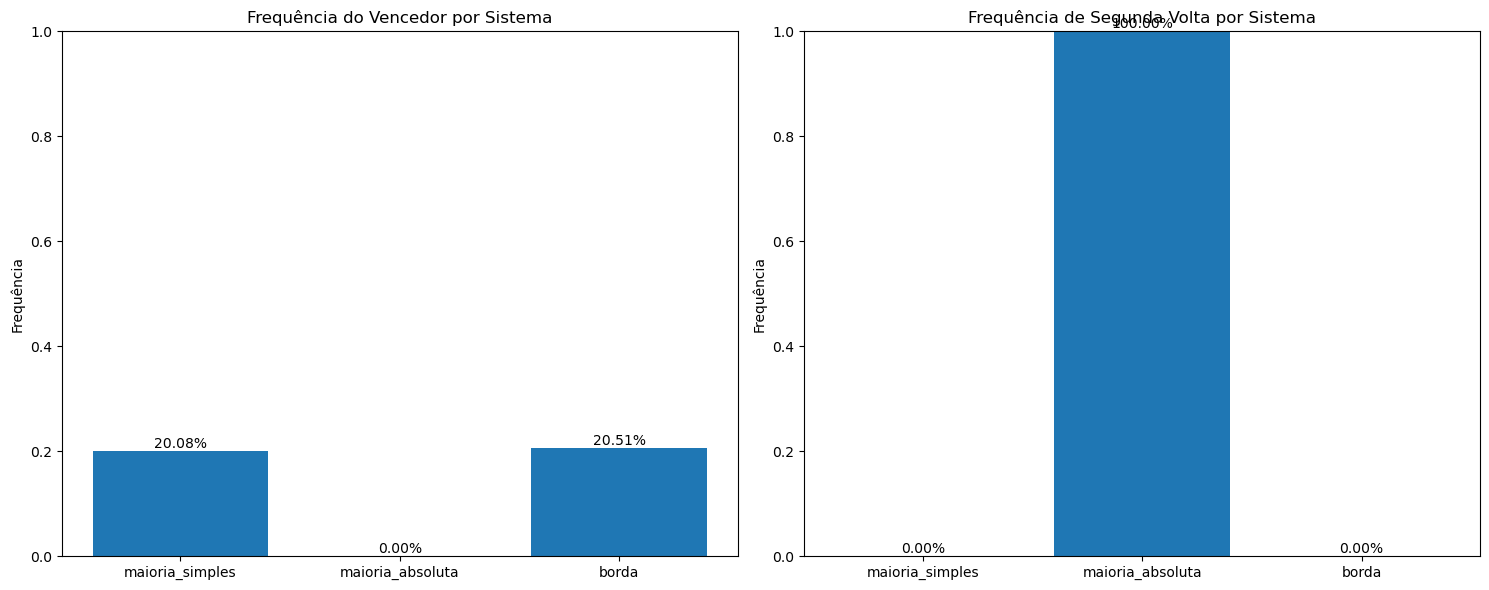

In [80]:
import random
import matplotlib.pyplot as plt
from collections import Counter

def simular_eleicao(num_eleitores, num_candidatos, sistema_eleitoral):
    if sistema_eleitoral in ['maioria_simples', 'maioria_absoluta']:
        votos = [random.randint(1, num_candidatos) for _ in range(num_eleitores)]
        contagem = Counter(votos)
        
        if sistema_eleitoral == 'maioria_simples':
            return max(contagem, key=contagem.get)
        elif sistema_eleitoral == 'maioria_absoluta':
            if max(contagem.values()) > num_eleitores / 2:
                return max(contagem, key=contagem.get)
            else:
                return 'Segunda Volta'
    elif sistema_eleitoral == 'borda':
        votos = [random.sample(range(1, num_candidatos + 1), num_candidatos) for _ in range(num_eleitores)]
        pontuacao = {i: 0 for i in range(1, num_candidatos + 1)}
        for voto in votos:
            for posicao, candidato in enumerate(voto):
                pontuacao[candidato] += num_candidatos - posicao
        return max(pontuacao, key=pontuacao.get)
    else:
        return 'Sistema não reconhecido'

def executar_simulacoes(num_simulacoes, num_eleitores, num_candidatos):
    sistemas = ['maioria_simples', 'maioria_absoluta', 'borda']
    resultados = {sistema: [] for sistema in sistemas}
    
    for _ in range(num_simulacoes):
        for sistema in sistemas:
            resultados[sistema].append(simular_eleicao(num_eleitores, num_candidatos, sistema))
    
    return resultados

def analisar_resultados(resultados, num_simulacoes):
    analise = {}
    for sistema, res in resultados.items():
        contagem = Counter(res)
        segunda_volta_freq = contagem.get('Segunda Volta', 0) / num_simulacoes
        contagem.pop('Segunda Volta', None)
        
        if contagem:
            vencedor = max(contagem, key=contagem.get)
            freq_vencedor = contagem[vencedor] / num_simulacoes
        else:
            vencedor = 'Não determinado'
            freq_vencedor = 0
        
        analise[sistema] = {
            'vencedor': vencedor,
            'freq_vencedor': freq_vencedor,
            'segunda_volta_freq': segunda_volta_freq
        }
    return analise

def visualizar_resultados(analise):
    sistemas = list(analise.keys())
    freq_vencedor = [analise[s]['freq_vencedor'] for s in sistemas]
    segunda_volta_freq = [analise[s]['segunda_volta_freq'] for s in sistemas]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Gráfico de barras para frequência do vencedor
    ax1.bar(sistemas, freq_vencedor)
    ax1.set_title('Frequência do Vencedor por Sistema')
    ax1.set_ylabel('Frequência')
    ax1.set_ylim(0, 1)
    for i, v in enumerate(freq_vencedor):
        ax1.text(i, v, f'{v:.2%}', ha='center', va='bottom')

    # Gráfico de barras para frequência de segunda volta
    ax2.bar(sistemas, segunda_volta_freq)
    ax2.set_title('Frequência de Segunda Volta por Sistema')
    ax2.set_ylabel('Frequência')
    ax2.set_ylim(0, 1)
    for i, v in enumerate(segunda_volta_freq):
        ax2.text(i, v, f'{v:.2%}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# Parâmetros da simulação
num_simulacoes = 10000
num_eleitores = 1000
num_candidatos = 5

# Executar simulações
resultados = executar_simulacoes(num_simulacoes, num_eleitores, num_candidatos)

# Analisar resultados
analise = analisar_resultados(resultados, num_simulacoes)

# Imprimir resultados
print(f"\nResultados das simulações ({num_simulacoes} simulações, {num_eleitores} eleitores, {num_candidatos} candidatos):")
for sistema, dados in analise.items():
    print(f"\n{sistema.capitalize()}:")
    print(f"  Vencedor mais frequente: {'Candidato ' + str(dados['vencedor']) if dados['vencedor'] != 'Não determinado' else dados['vencedor']}")
    print(f"  Frequência do vencedor: {dados['freq_vencedor']:.2%}")
    if sistema == 'maioria_absoluta':
        print(f"  Frequência de segunda volta: {dados['segunda_volta_freq']:.2%}")

# Visualizar resultados
visualizar_resultados(analise)

## Questões 

### Maioria Simples

Numa eleição com três candidatos, os votos são distribuídos da seguinte forma:

- A: 45 votos
- B: 30 votos
- C: 25 votos

Quem é o vencedor pela maioria simples?

```{dropdown} Clique para ver a resposta
**Resposta correta: A**

### Maioria Absoluta

Numa eleição com três candidatos, os votos são distribuídos da seguinte forma:

- A: 45 votos
- B: 30 votos
- C: 25 votos

Há um vencedor pela maioria absoluta?

```{dropdown} Clique para ver a resposta
**Resposta correta: NÃO**

### Métodos Eleitorais

Qual dos seguintes métodos eleitorais:

- Maioria Simples
- Maioria Absoluta
- Voto Aleatório
  
garante que o vencedor tenha mais de 50% dos votos?

```{dropdown} Clique para ver a resposta
**Resposta correta: MAIORIA ABSOLUTA**

## Discussão

- Qual o método eleitoral mais justo? Porquê?
- Em que situações a maioria simples pode não ser a melhor escolha?
- Como o método de Hondt afeta a representação de partidos menores em comparação com a maioria simples?
- Como a matemática pode ajudar a tornar as eleições mais justas e transparentes?

In [86]:
from IPython.display import HTML, display

flashcards = [
    {
        "question": "Qual o método eleitoral mais justo? Porquê?",
        "answer": "A justiça de um método eleitoral pode depender do contexto. A maioria simples é direta e fácil de entender, mas pode não refletir a verdadeira preferência do eleitorado em eleições com mais de dois candidatos. A maioria absoluta garante que o vencedor tenha o apoio da maioria dos eleitores, o que pode ser visto como mais representativo em eleições com múltiplos candidatos. O método de Hondt busca uma representação proporcional em sistemas legislativos, o que pode ser considerado mais justo em eleições parlamentares."
    },
    {
        "question": "Em que situações a maioria simples pode não ser a melhor escolha?",
        "answer": "A maioria simples pode não ser a melhor escolha em eleições com mais de dois candidatos, pois um candidato pode vencer sem obter a maioria dos votos. Isso pode resultar em um vencedor que não tem o apoio da maioria dos eleitores. Por exemplo, se três candidatos recebem 40%, 35% e 25% dos votos, o candidato com 40% vence, mesmo que 60% dos eleitores prefiram outros candidatos."
    },
    {
        "question": "Como o método de Hondt afeta a representação de partidos menores em comparação com a maioria simples?",
        "answer": "O método de Hondt tende a favorecer partidos maiores em comparação com alguns outros métodos de representação proporcional, mas ainda oferece mais oportunidades para partidos menores obterem representação do que o sistema de maioria simples. Enquanto na maioria simples um partido menor pode não conseguir nenhuma representação, no método de Hondt ele pode obter assentos proporcionais à sua parcela de votos, embora com uma ligeira vantagem para partidos maiores."
    },
    {
        "question": "Como a matemática pode ajudar a tornar as eleições mais justas e transparentes?",
        "answer": "A matemática pode ajudar a tornar as eleições mais justas e transparentes ao fornecer métodos rigorosos para contar votos e determinar vencedores. Métodos como a maioria absoluta e o método de Hondt podem ajudar a garantir que o resultado da eleição reflita melhor a vontade do eleitorado. Além disso, a matemática pode ser usada para detectar e prevenir fraudes eleitorais, analisar padrões de votação e melhorar a acessibilidade e a eficiência dos processos eleitorais."
    }
]

html_content = """
<div id="flashcards-app">
    <h2>Flashcards de Métodos Eleitorais</h2>
    <div id="flashcard-container" style="border: 1px solid #ccc; min-height: 200px; margin: 20px 0;">
        Carregando flashcards...
    </div>
    <div id="controls">
        <button id="prev">Anterior</button>
        <button id="next">Próximo</button>
    </div>
    <div id="debug-info" style="margin-top: 20px; font-style: italic;"></div>
</div>

<script>
(function() {{
    const flashcards = {flashcards};
    let currentIndex = 0;

    function createFlashcard(flashcard) {{
        return `
            <div class="flashcard">
                <div class="flashcard-inner">
                    <div class="flashcard-front">
                        <h3>${{flashcard.question}}</h3>
                    </div>
                    <div class="flashcard-back">
                        <p>${{flashcard.answer}}</p>
                    </div>
                </div>
            </div>
        `;
    }}

    function showFlashcard(index) {{
        const container = document.getElementById('flashcard-container');
        container.innerHTML = createFlashcard(flashcards[index]);
        
        container.querySelector('.flashcard').addEventListener('click', function() {{
            this.classList.toggle('flipped');
        }});

        document.getElementById('debug-info').textContent = `Mostrando flashcard ${{index + 1}} de ${{flashcards.length}}`;
    }}

    function setupEventListeners() {{
        document.getElementById('prev').addEventListener('click', function() {{
            currentIndex = (currentIndex - 1 + flashcards.length) % flashcards.length;
            showFlashcard(currentIndex);
        }});

        document.getElementById('next').addEventListener('click', function() {{
            currentIndex = (currentIndex + 1) % flashcards.length;
            showFlashcard(currentIndex);
        }});
    }}

    function init() {{
        console.log('Inicializando flashcards:', flashcards);
        if (flashcards && flashcards.length > 0) {{
            showFlashcard(currentIndex);
            setupEventListeners();
        }} else {{
            document.getElementById('flashcard-container').innerHTML = 'Erro: Nenhum flashcard disponível.';
        }}
    }}

    // Garantir que o DOM está completamente carregado antes de inicializar
    if (document.readyState === 'loading') {{
        document.addEventListener('DOMContentLoaded', init);
    }} else {{
        init();
    }}
}})();
</script>

<style>
#flashcards-app {{
    font-family: Arial, sans-serif;
    max-width: 600px;
    margin: 0 auto;
}}
.flashcard {{
    width: 100%;
    height: 200px;
    perspective: 1000px;
}}
.flashcard-inner {{
    position: relative;
    width: 100%;
    height: 100%;
    text-align: center;
    transition: transform 0.6s;
    transform-style: preserve-3d;
    cursor: pointer;
}}
.flashcard.flipped .flashcard-inner {{
    transform: rotateY(180deg);
}}
.flashcard-front, .flashcard-back {{
    position: absolute;
    width: 100%;
    height: 100%;
    -webkit-backface-visibility: hidden;
    backface-visibility: hidden;
    display: flex;
    align-items: center;
    justify-content: center;
    padding: 20px;
    box-sizing: border-box;
    border: 1px solid #ddd;
    border-radius: 10px;
    background-color: #f9f9f9;
}}
.flashcard-back {{
    transform: rotateY(180deg);
    overflow-y: auto;
}}
#controls {{
    text-align: center;
    margin-top: 20px;
}}
button {{
    margin: 0 10px;
    padding: 10px 20px;
    font-size: 16px;
    cursor: pointer;
}}
#debug-info {{
    text-align: center;
    color: #666;
}}
</style>
"""

# Renderiza o conteúdo HTML
display(HTML(html_content.format(flashcards=flashcards)))